In [48]:
import numpy as np
import matplotlib.pyplot as plt
import x_sites
import importlib
importlib.reload(x_sites)

<module 'x_sites' from '/home/yamamoto/Dropbox/study/ed_hubbard/x_sites.py'>

In [49]:
ops = x_sites.make_local_ops()
cdag = ops['c^+']
c = ops['c^-']
I = ops['I']
F = ops['F']

In [50]:
cdag

array([[0., 0.],
       [1., 0.]])

In [51]:
Cdag = {}
Cdag['1u'] = x_sites.make_matrix([I, cdag])
Cdag['1d'] = x_sites.make_matrix([cdag, F])

In [52]:
C = {}
N = {}
C['1d'] = Cdag['1d'].conj().T
C['1u'] = Cdag['1u'].conj().T
N['1d'] = Cdag['1d'] @ C['1d']
N['1u'] = Cdag['1u'] @ C['1u']

In [53]:
U = 1.0
mu = U/2.0
hamil = U*N['1d']@N['1u'] - mu*(N['1d'] + N['1u'])

In [54]:
eigval, eigvec = np.linalg.eigh(hamil)

In [55]:
eigval

array([-0.5, -0.5,  0. ,  0. ])

In [56]:
x_sites.make_G(eigval, eigvec, Cdag['1d'], C['1d'], -1.0)

(-0.6637168141592921-0.04424778761061947j)

In [57]:
omegamesh = 100
omega_min = -10.0
omega_max = 10.0

omegas = [omega_min + (-omega_min + omega_max)*iomega /
          omegamesh for iomega in range(omegamesh)]
Gs = []

In [58]:
for omega in omegas:
    Gs.append(x_sites.make_PES(eigval, eigvec, Cdag['1d'], C['1d'], omega) + x_sites.make_BIS(
        eigval, eigvec, Cdag['1d'], C['1d'], omega))

In [59]:
Gs = np.array(Gs)

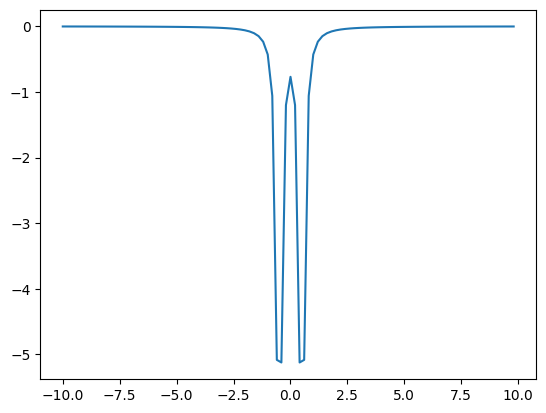

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(omegas, Gs.imag)

In [61]:
omegas = np.array(omegas)

In [62]:
sigma = omegas + mu - 1/Gs

In [63]:
G_hI = []
k_min = -np.pi
k_max = np.pi
k_mesh = 100
ks = [k_min + (-k_min + k_max)*ik/k_mesh for ik in range(k_mesh)]
for k in ks:
    G_hI.append(1.0/(omegas + mu + np.cos(k) - sigma))

In [64]:
G_hI = np.array(G_hI)
G_hI = G_hI.T

In [65]:
G_hI.shape

(100, 100)

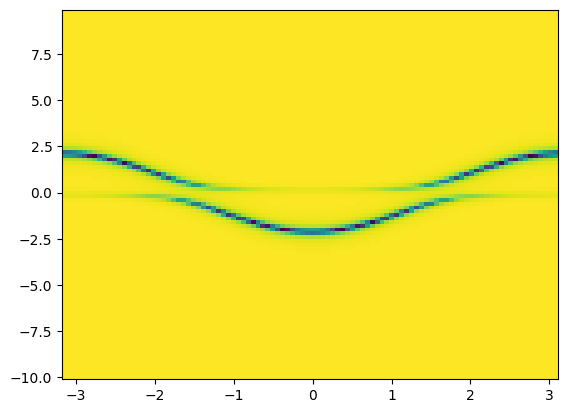

In [66]:
fig = plt.figure()
ax = fig.add_subplot()
X,Y = np.meshgrid(ks,omegas)
ax.pcolormesh(X, Y, G_hI.imag)